# Web Scraping Tennis Racquet Data

I am web scraping data on tennis racquets from Tennis Warehouse to help me make a decision on the next tennis racquet that I buy. After acquiring the data, I will do most of my analysis in Tableau.

### Importing Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_colwidth', None)

### Racquet Links

Scraping each of the racquet brand pages to get links to the racquet pages for each brand

In [2]:
headers = {
    'User-Agent': 'https://developers.whatismybrowser.com/useragents/parse/1252728chrome-windows-blink' 
}

brand_urls = ['https://www.tennis-warehouse.com/Babolatracquets.html',
               'https://www.tennis-warehouse.com/Wilsonracquets.html',
               'https://www.tennis-warehouse.com/Headracquets.html',
             'https://www.tennis-warehouse.com/Princeracquets.html',
              'https://www.tennis-warehouse.com/Yonexracquets.html',
             'https://www.tennis-warehouse.com/Dunlopracquets.html',
             'https://www.tennis-warehouse.com/Tecnifibreracquets.html']

In [3]:
racquet_links = []
for url in brand_urls:

    page = requests.get(url, headers = headers).text
    soup=BeautifulSoup(page,'html.parser')
    racquet_list = soup.find_all('div' ,{'class':"cattable-wrap-cell-tagline_info"})
    for racquet in racquet_list:
        link = racquet.find('a', {'class':'cattable-wrap-cell-info'}).get('href')
        racquet_links.append(link)

In [4]:
# Removing links that aren't for racquets and links that are for junior racquets
racquet_links = [x for x in racquet_links if 'www.tennis-warehouse' in x 
                 and 'Junior' not in x 
                and 'podcast' not in x
                and 'Pack' not in x]

### Racquet Name & Price
Getting the racquet names and prices using the racquet links we scraped above

In [5]:
data = []
for link in racquet_links:
    response = requests.get(link, headers = headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    title = soup.find('h1' ,itemprop='name')
    name = title.string
    
    price_info = soup.find('span', {'class':'afterpay-full_price'})
    price = price_info.text
    
    racquet_dict = {'Racquet':name, 'Price':price, 'Link':link}
    data.append(racquet_dict)

In [6]:
racquet_info = pd.DataFrame(data)
racquet_info.head()

,Racquet,Price,Link
0,Babolat Pure Aero,239.00,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
1,Babolat Pure Aero Rafa,259.00,https://www.tennis-warehouse.com/Babolat_Pure_Aero_Rafa/descpageRCBAB-BPARR.html
2,Babolat Pure Aero VS,279.00,https://www.tennis-warehouse.com/Babolat_Pure_Aero_VS/descpageRCBAB-BPAVSR.html
3,Babolat Pure Aero Rafa Team,229.00,https://www.tennis-warehouse.com/Babolat_Pure_Aero_Rafa_Team/descpageRCBAB-BPARTR.html
4,Babolat Pure Aero Rafa Lite,229.00,https://www.tennis-warehouse.com/Babolat_Pure_Aero_Rafa_Lite/descpageRCBAB-BPARLR.html


In [7]:
racquet_info['Price'] = racquet_info['Price'].astype(float)

### Players Using Racquet
Creating a dataframe that captures the professional players using each racquet

In [8]:
dfs = []
for link in racquet_links:
    response = requests.get(link, headers = headers)
    soup=BeautifulSoup(response.text,'html.parser')
    player = soup.find_all('div',{'class':'cattable-wrap-cell-info-name'})
    temp_df = pd.DataFrame(player)
    temp_df['Link'] = link
    dfs.append(temp_df)

In [9]:
player_df = pd.concat(dfs)
player_df.columns = ['Player', 'Link']

In [10]:
player_df.head()

,Player,Link
0,Rafael Nadal,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
1,Felix Auger-Aliassime,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
2,Jennifer Brady,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
3,Danielle Collins,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
4,Leylah Fernandez,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html


In [11]:
player_df['Player'].unique()

array(['Rafael Nadal', 'Felix Auger-Aliassime', 'Jennifer Brady',
       'Danielle Collins', 'Leylah Fernandez', 'Johanna Konta',
       'Bethanie Mattek-Sands', 'Head Graphene 360+ Extreme MP',
       'Prince Textreme Warrior 100', 'Volkl V-Cell 10 300g',
       'Yonex VCORE 100', 'Babolat Pure Aero Rafa 12 Pack Bag ',
       'Babolat Pure Aero/+/Tour/Lite/Team 2019 Grommet',
       'Babolat RPM Blast Orange 16/1.30 String',
       "Nike Men's Spring Rafa Heritage 86 Hat",
       'Babolat Pure Drive 2021', 'Prince Ripstick 100 300g',
       'Babolat RPM Blast 16/1.30 String',
       "Nike Men's Core Rafa Heritage 86 Hat", 'Carlos Alcaraz',
       'Holger Rune', 'Babolat Pure Drive VS', 'Dunlop FX 500 Tour',
       'Head Graphene 360+ Extreme Tour',
       'Prince ATS Textreme Tour 100 310',
       'Babolat Pure Aero VS 2020 Grommet',
       'Babolat Pure Aero VS 9-Pack Bag', 'Babolat Xcel 16/1.30 String',
       'Solinco Blackout 285', 'Yonex EZONE 100L 2022',
       'Babolat Pro Tour

Players using the racquet and related products are located in the same section, so some of the rows in the above dataframe are not player names. I will remove these extra rows below.

In [12]:
player_df['Player'] = player_df['Player'].apply(lambda x: x if 'Tecnifibre' not in x and 'Babolat' not in x 
                                              and 'Wilson' not in x and 'Yonex' not in x and 'Head' not in x 
                                              and 'Prince' not in x and 'Dunlop' not in x 
                                              and 'Nike' not in x and 'ProKennex' not in x and 'Lacoste' not in x 
                                              and 'Volkl' not in x and 'Solinco' not in x 
                                              and '/' not in x else 'False')

In [13]:
player_df = player_df[player_df['Player'] != 'False']

### Racquet Review Scores
Some racquets have been reviewed by Tennis Warehouse, so I want to retrieve the review scores for all the racquets that have been reviewed.

In [20]:
dfs = []
for link in racquet_links:
    response = requests.get(link, headers = headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        review_endpoint = soup.find('a', {'class':'btn btn-outline-dark btn-block ga_event'}).get('href')
        review_link = 'https://www.tennis-warehouse.com' + str(review_endpoint)

        response = requests.get(review_link, headers = headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        scores = soup.find_all('div',{'class':'scores'})
        html = pd.read_html(str(scores))
        temp_df = pd.DataFrame(html[0])
        temp_df.columns = ['Category','Score']
        temp_df['Racquet Link'] = link
        dfs.append(temp_df)
    except:
        pass

In [21]:
review_df = pd.concat(dfs)

In [22]:
review_df.head()

,Category,Score,Racquet Link
0,Overall,86,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
1,Groundstrokes,89,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
2,Volleys,82,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
3,Serves,87,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html
4,Returns,82,https://www.tennis-warehouse.com/Babolat_Pure_Aero/descpageRCBAB-BPAR.html


In [23]:
review_df = pd.pivot(review_df, index = 'Racquet Link', columns = 'Category', values = 'Score').reset_index()

### Racquet Specs

In [25]:
racquet_names = list(racquet_info['Racquet'])

dfs = []
for link, racquet in zip(racquet_links, racquet_names):
    response = requests.get(link, headers = headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    specs = soup.find_all('table' ,{'class': None})
    try:
        html = pd.read_html(str(specs))
        temp_df = pd.DataFrame(html[0])
        temp_df.columns = ['Specs']
        temp_df['Racquet'] = racquet
        dfs.append(temp_df)
    except:
        pass

In [26]:
specs_df = pd.concat(dfs, ignore_index=True)

In [27]:
# Creating a column that stores the racquet spec category name, and another column with the value
specs_df['Spec'] = specs_df['Specs'].str.split(':').str[0]
specs_df['Value'] = specs_df['Specs'].str.split(':').str[1]
specs_df.drop('Specs',axis=1,inplace=True)

In [28]:
specs_df['Racquet'].value_counts()

Head Graphene 360+ Extreme PWR    40
Head Instinct PWR 110 2022        30
Head Graphene XT Instinct PWR     30
Head Instinct PWR 115 2022        30
Babolat Pure Strike VS            30
                                  ..
Prince Twistpower X100            15
Prince Twistpower X105 (290g)     15
Babolat Boost Aero Yellow         15
Tecnifibre Tempo 298 Iga          15
Head Titanium Ti.S6 Strung        14
Name: Racquet, Length: 253, dtype: int64

It appears that some products are listed twice on the website, so there are duplicate racquets in this dataframe. There are 14-15 racquet spec categories, so any racquet showing more than a value of 15 above is a duplicate.

In [29]:
# Dropping duplicates
specs_df['concat'] = specs_df['Racquet']+'-'+specs_df['Spec']

specs_df = specs_df.reset_index()
specs_df = specs_df.sort_values(['Racquet','concat','index'])

specs_df = specs_df.drop_duplicates(subset=['concat'],keep='first')
specs_df.drop(['index','concat'],axis=1,inplace=True)

In [30]:
# Reshaping the df so that each spec category will be a column
specs_df = pd.pivot(specs_df, index='Racquet', columns='Spec', values='Value')
specs_df = specs_df.reset_index()

In [31]:
# Selecting only desired racquet specs
specs_df = specs_df[['Racquet','Head Size','Length','Strung Weight','Balance',
                    'Swingweight','Stiffness', 'Beam Width',
                    'Composition','Power Level', 'Stroke Style', 
                     'Swing Speed', 'Racquet Colors', 'Grip Type',
                     'String Pattern', 'String Tension']]

In [32]:
# Cleaning columns to remove extra unwanted characters

specs_df['Head Size'] = specs_df['Head Size'].str.split('in').str[0]
specs_df['Head Size'] = specs_df['Head Size'].str.replace("[^0-9]", '')

specs_df['Length'] = specs_df['Length'].str.split('in').str[0]

specs_df['Strung Weight'] = specs_df['Strung Weight'].str.split('oz').str[0]

specs_df['Balance'] = specs_df['Balance'].str.split('cm / ').str[1]

specs_df['Stiffness'] = specs_df['Stiffness'].str.replace("[^0-9]", '')

specs_df['String Pattern'] = specs_df['String Pattern'].str.replace("[^0-9]", '')
specs_df['String Pattern'] = specs_df['String Pattern'].str[0:2] + 'x' + specs_df['String Pattern'].str[2:4]
specs_df['String Pattern'] = specs_df['String Pattern'].apply(lambda x: x.lstrip())

In [33]:
cols = specs_df.columns
specs_df[cols] = specs_df.apply(pd.to_numeric, errors='ignore')

In [34]:
specs_df.head()

Spec,Racquet,Head Size,Length,Strung Weight,Balance,Swingweight,Stiffness,Beam Width,Composition,Power Level,Stroke Style,Swing Speed,Racquet Colors,Grip Type,String Pattern,String Tension
0,Babolat Boost Aero Rafa,102,27.0,9.8,2 pts HH,306,67.0,23mm / 26mm / 23mm,Graphite,Low-Medium,Medium-Full,Medium-Fast,Black/Yellow/Purple,Babolat Uptake,16x19,50-55 pounds
1,Babolat Boost Aero W,102,27.0,9.8,2 pts HH,306,67.0,23mm / 26mm / 23mm,Graphite,Low-Medium,Medium-Full,Medium-Fast,Black/Pink,Babolat Uptake,16x19,50-55 pounds
2,Babolat Boost Aero Yellow,102,27.0,9.8,2 pts HH,306,67.0,23mm / 26mm / 23mm,Graphite,Low-Medium,Medium-Full,Medium-Fast,Black/Yellow,Babolat Uptake,16x19,50-55 pounds
3,Babolat Boost Drive,105,27.0,9.6,3 pts HH,312,65.0,23mm / 26mm / 23mm,Graphite,Medium,Medium,Medium,Purple/Yellow/White,Babolat Synthetic,16x19,50-55 pounds
4,Babolat Boost Drive W,105,27.0,9.6,3 pts HH,312,65.0,23mm / 26mm / 23mm,Graphite,Medium,Medium,Medium,White,Babolat Synthetic,16x19,50-55 pounds


In [35]:
specs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Racquet         253 non-null    object 
 1   Head Size       253 non-null    int64  
 2   Length          253 non-null    float64
 3   Strung Weight   253 non-null    float64
 4   Balance         250 non-null    object 
 5   Swingweight     253 non-null    int64  
 6   Stiffness       251 non-null    float64
 7   Beam Width      253 non-null    object 
 8   Composition     253 non-null    object 
 9   Power Level     253 non-null    object 
 10  Stroke Style    252 non-null    object 
 11  Swing Speed     253 non-null    object 
 12  Racquet Colors  252 non-null    object 
 13  Grip Type       253 non-null    object 
 14  String Pattern  253 non-null    object 
 15  String Tension  253 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 31.8+ KB


#### Extended Length
Creating a column to indicate whether the racquet has extended length, which is defined as greater than 27 inches. Having extended length can be helpful in gaining more reach for the ball.

In [36]:
specs_df['Extended Length'] = specs_df['Length'] > 27

#### Mid-Tension
Creating a column that contains the mid-tension, which is the midpoint tension value of the recommended string tension range.

In [37]:
specs_df['Mid-Tension'] = (specs_df['String Tension'].str[1:3].astype(int) + specs_df['String Tension'].str[4:6].astype(int))/2

In [38]:
racquet_df = pd.merge(specs_df, racquet_info, how = 'left', on = 'Racquet')

In [39]:
racquet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Racquet          258 non-null    object 
 1   Head Size        258 non-null    int64  
 2   Length           258 non-null    float64
 3   Strung Weight    258 non-null    float64
 4   Balance          254 non-null    object 
 5   Swingweight      258 non-null    int64  
 6   Stiffness        256 non-null    float64
 7   Beam Width       258 non-null    object 
 8   Composition      258 non-null    object 
 9   Power Level      258 non-null    object 
 10  Stroke Style     257 non-null    object 
 11  Swing Speed      258 non-null    object 
 12  Racquet Colors   257 non-null    object 
 13  Grip Type        258 non-null    object 
 14  String Pattern   258 non-null    object 
 15  String Tension   258 non-null    object 
 16  Extended Length  258 non-null    bool   
 17  Mid-Tension     

### How Expensive are these Racquets?

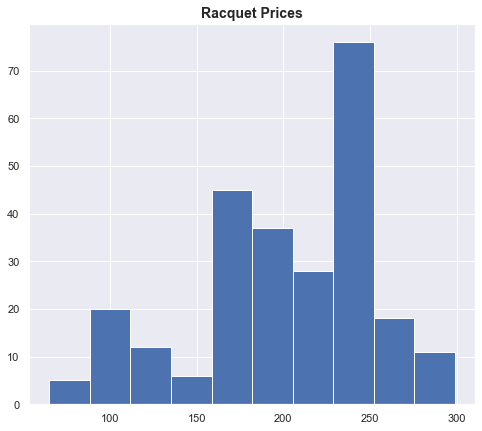

In [40]:
figure = plt.figure(figsize=(8,7))
plt.hist(racquet_df['Price'])
plt.title('Racquet Prices', fontsize=14, fontweight='bold')
plt.show()

In [41]:
racquet_df['String Pattern'].value_counts()

16x19    173
16x18     32
18x20     22
16x20     12
16x17      5
18x19      4
18x16      4
14x21      2
14x18      1
18x18      1
14x16      1
16x16      1
Name: String Pattern, dtype: int64

### Racquet Stiffness Level
The stiffer the racquet, the more powerful and stable the racquet is, though the more jarring the racquet will be on the arm.

In [42]:
def stiffness(df):
    if df['Stiffness'] <= 63:
        return 'Flexible'
    elif df['Stiffness'] > 68:
        return 'Stiff'
    else:
        return 'Medium'

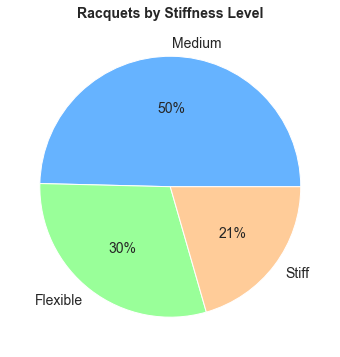

In [43]:
racquet_df['Stiffness Level'] = racquet_df.apply(stiffness, axis = 1)

figure = plt.figure(figsize=(6,6))
plt.pie(racquet_df['Stiffness Level'].value_counts(), labels = list(racquet_df['Stiffness Level'].unique()),
       colors = ['#66b3ff','#99ff99','#ffcc99'], autopct='%1.0f%%', textprops={'fontsize': 14})
plt.title('Racquets by Stiffness Level', fontsize=14, fontweight='bold')
plt.show()

### Which Brands are Most Common?

In [45]:
racquet_df['Brand'] = racquet_df['Racquet'].str.split(' ').str[0]

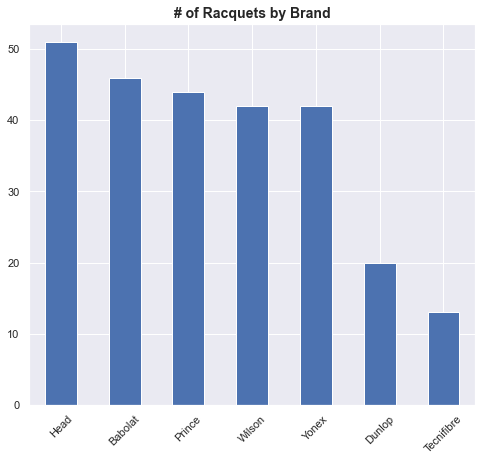

In [53]:
figure = plt.figure(figsize=(8,7))
racquet_df['Brand'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.title('# of Racquets by Brand', fontweight = 'bold', fontsize = 14)
plt.show()

### Strung Weight and Stiffness
Is there a relationship visible between strung weight and stiffness?

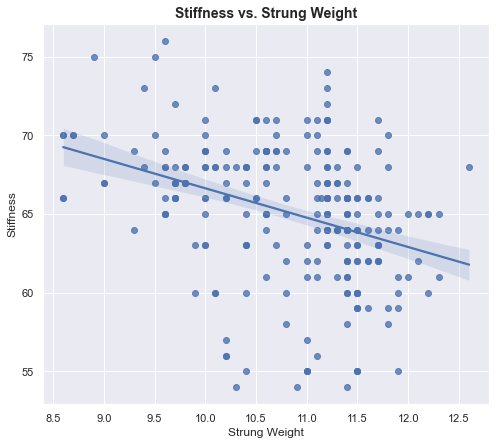

In [56]:
figure = plt.figure(figsize=(8,7))
sns.regplot(x=racquet_df['Strung Weight'], y = racquet_df['Stiffness'])
plt.title('Stiffness vs. Strung Weight', fontweight= 'bold', fontsize = 14)
plt.show()

In [61]:
# Correlation coefficient of strung weight and stiffness
racquet_df.corr()['Strung Weight']['Stiffness']

-0.36266915673685235

There is a low negative correlation between strung weight and stiffness. There are likely other more telling indicators of stiffness, such as the string pattern or the materials composition of the racquet.

## Tableau Dashboard
For more visual analysis, see the Tableau dashboard link below

[Link to Tableau](https://public.tableau.com/app/profile/r.prabhu/viz/SearchingforMyNextTennisRacquet/RacquetOverview)